# $\color{#203864}{\text{Data Overviwe}}$  

### This data is a folder containing 12 files that display sales for the year 2019 for each month separately.
- **Order ID:** A unique identifier for each order placed
- **Product:** The name or description of the item sold  
- **Quantity Ordered:** The number of units of the product purchased in the order  
- **Price Eachs:** This is the unit price of each product in USD,It provides the cost per item   
- **Order Date:** The date and time when the order was placed
- **Purchase Address:** The address where the order was shipped or where the customer resides. This includes the street, city, state, and ZIP code 

# $\color{#203864}{\text{Import Liberaries}}$  

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
import os
import warnings
warnings.filterwarnings('ignore')

## $\color{#203864}{\text{Define Charts Theme}}$  

In [2]:
plt.rcParams.update({
    "axes.facecolor": "#ffffff",  
    "grid.color": "#60C2E9",      
    "grid.linestyle": "--",       
    "text.color": "60C2E9",        
    "axes.labelcolor": "60C2E9",
    "xtick.color": "203864",
    "ytick.color": "#203864",
    "axes.edgecolor": "#60C2E9",
    "figure.facecolor": "#ffffff",
})


### $\color{#60C2E9}{\text{ Let's merge all these files in one csv file}}$ 

In [3]:
path = "./Sales_Dataset"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

merged_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    merged_data = pd.concat([merged_data, current_data], ignore_index=True)  # Update merged_data

merged_data.to_csv("merged_data.csv", index=False)
print("Done...........^_^")


Done...........^_^


In [4]:
merged_data = pd.read_csv("merged_data.csv")
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# $\color{#203864}{\text{Data Wrangling}}$  

In [5]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [6]:
merged_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
# Find NAN Values
nan_df = merged_data[merged_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
merged_data = merged_data.dropna(how='all')
merged_data.sample(n=10, random_state=123)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
49148,313582,USB-C Charging Cable,1,11.95,12/29/19 13:10,"440 Lakeview St, Dallas, TX 75001"
56883,151814,AAA Batteries (4-pack),1,2.99,02/16/19 23:10,"833 River St, Boston, MA 02215"
19710,237946,Lightning Charging Cable,1,14.95,08/06/19 23:28,"554 Main St, New York City, NY 10001"
125086,198457,Wired Headphones,1,11.99,05/18/19 12:17,"287 Spruce St, New York City, NY 10001"
75788,149088,AAA Batteries (4-pack),1,2.99,01/27/19 22:25,"311 Washington St, Austin, TX 73301"
115619,171907,Lightning Charging Cable,2,14.95,03/16/19 16:53,"582 Church St, Los Angeles, CA 90001"
44994,309603,34in Ultrawide Monitor,1,379.99,12/28/19 19:21,"203 Hill St, New York City, NY 10001"
107400,164042,ThinkPad Laptop,1,999.99,03/18/19 21:20,"965 6th St, Portland, OR 97035"
49812,314221,AAA Batteries (4-pack),1,2.99,12/07/19 16:26,"623 9th St, New York City, NY 10001"
127207,200475,LG Dryer,1,600.0,05/14/19 23:18,"86 Adams St, San Francisco, CA 94016"


In [9]:
invalid_rows = merged_data[pd.to_numeric(merged_data['Quantity Ordered'], errors='coerce').isna()]
invalid_rows 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [10]:
# Drop rows where parsing fails in 'Quantity Ordered' column
merged_data = merged_data[pd.to_numeric(merged_data['Quantity Ordered'], errors='coerce').notna()]
# Reset the index if needed
merged_data.reset_index(drop=True, inplace=True)

In [11]:
merged_data.sample(n=10, random_state=123)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
13604,189597,Wired Headphones,2,11.99,04/21/19 11:12,"240 Chestnut St, Dallas, TX 75001"
174421,248248,Apple Airpods Headphones,1,150.0,09/14/19 15:12,"769 6th St, New York City, NY 10001"
47855,312574,USB-C Charging Cable,2,11.95,12/13/19 22:42,"571 Church St, Los Angeles, CA 90001"
56333,151556,iPhone,1,700,02/07/19 10:15,"240 Lake St, Portland, OR 97035"
70071,143950,AA Batteries (4-pack),1,3.84,01/20/19 12:44,"544 South St, Austin, TX 73301"
33782,299048,Apple Airpods Headphones,1,150,12/28/19 17:12,"688 11th St, Los Angeles, CA 90001"
148535,290383,USB-C Charging Cable,1,11.95,11/20/19 18:56,"733 Adams St, San Francisco, CA 94016"
118396,175103,AAA Batteries (4-pack),3,2.99,03/08/19 20:36,"777 Park St, New York City, NY 10001"
182750,256265,USB-C Charging Cable,1,11.95,09/05/19 21:20,"87 Jackson St, San Francisco, CA 94016"
162432,267410,Bose SoundSport Headphones,1,99.99,10/05/19 16:14,"484 Maple St, Atlanta, GA 30301"


In [12]:
# Convert numeric data type columns 
merged_data['Quantity Ordered'] = pd.to_numeric(merged_data['Quantity Ordered'])
merged_data['Price Each'] = pd.to_numeric(merged_data['Price Each'])

In [13]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.5+ MB


In [14]:
# Convert date data type columns
merged_data['Order Date'] = pd.to_datetime(merged_data['Order Date'])
merged_data['Month'] = pd.to_datetime(merged_data['Order Date']).dt.month
merged_data['Hour'] = pd.to_datetime(merged_data['Order Date']).dt.hour
merged_data['Minute'] = pd.to_datetime(merged_data['Order Date']).dt.minute

In [15]:
# Function to calculate quarter based on month
def get_quarter(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    elif month in [10, 11, 12]:
        return 'Q4'

# Apply the function to the 'Month' column
merged_data['Quarter'] = merged_data['Month'].apply(get_quarter)

# Display the updated DataFrame
merged_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Minute,Quarter
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,46,Q2
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,30,Q2
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,Q2
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,Q2
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,27,Q2
...,...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,20,56,Q3
185946,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,16,0,Q3
185947,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,7,39,Q3
185948,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,17,30,Q3


In [16]:
merged_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
Hour                         int64
Minute                       int64
Quarter                     object
dtype: object

In [17]:
# Check Duplicates
merged_data.duplicated().sum()

264

In [18]:
merged_data.drop_duplicates(inplace=True)
merged_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Minute,Quarter
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,46,Q2
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,30,Q2
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,Q2
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,Q2
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,27,Q2
...,...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,20,56,Q3
185946,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,16,0,Q3
185947,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,7,39,Q3
185948,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,17,30,Q3


In [19]:
merged_data.duplicated().sum()

0

In [20]:
# Split Purchase Address Column
merged_data[['Street', 'City', 'State_ZIP']] = merged_data['Purchase Address'].str.split(',', expand=True)
merged_data[['State', 'ZIP Code']] = merged_data['State_ZIP'].str.strip().str.split(' ', expand=True)
merged_data = merged_data.drop(columns=['State_ZIP'])
merged_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Minute,Quarter,Street,City,State,ZIP Code
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,46,Q2,917 1st St,Dallas,TX,75001
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,30,Q2,682 Chestnut St,Boston,MA,02215
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,Q2,669 Spruce St,Los Angeles,CA,90001
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,Q2,669 Spruce St,Los Angeles,CA,90001
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,27,Q2,333 8th St,Los Angeles,CA,90001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,20,56,Q3,840 Highland St,Los Angeles,CA,90001
185946,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,16,0,Q3,216 Dogwood St,San Francisco,CA,94016
185947,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,7,39,Q3,220 12th St,San Francisco,CA,94016
185948,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,17,30,Q3,511 Forest St,San Francisco,CA,94016


In [21]:
merged_data['City'].unique()

array([' Dallas', ' Boston', ' Los Angeles', ' San Francisco', ' Seattle',
       ' Atlanta', ' New York City', ' Portland', ' Austin'], dtype=object)

In [22]:
# Remove whitespace in the 'City' column
merged_data['City'] = merged_data['City'].str.strip()
merged_data['City'].unique()

array(['Dallas', 'Boston', 'Los Angeles', 'San Francisco', 'Seattle',
       'Atlanta', 'New York City', 'Portland', 'Austin'], dtype=object)

In [23]:
merged_data['State'].unique()

array(['TX', 'MA', 'CA', 'WA', 'GA', 'NY', 'OR', 'ME'], dtype=object)

In [24]:
# Dictionary to map state abbreviations to full names
state_mapping = {
    'CA': 'California',
    'TX': 'Texas',
    'WA': 'Washington',
    'GA': 'Georgia',
    'ME': 'Maine',
    'NY': 'New York',
    'OR': 'Oregon',
    'MA': 'Massachusetts'
}
# Replace abbreviations with full state names
merged_data['State'] = merged_data['State'].map(state_mapping)

In [25]:
merged_data['State'].unique()

array(['Texas', 'Massachusetts', 'California', 'Washington', 'Georgia',
       'New York', 'Oregon', 'Maine'], dtype=object)

In [26]:
merged_data.sample(n=20,random_state=123)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Minute,Quarter,Street,City,State,ZIP Code
109748,166796,Bose SoundSport Headphones,1,99.99,2019-03-14 16:04:00,"879 6th St, Seattle, WA 98101",3,16,4,Q1,879 6th St,Seattle,Washington,98101
27971,245976,iPhone,1,700.00,2019-08-23 06:01:00,"476 Park St, Atlanta, GA 30301",8,6,1,Q3,476 Park St,Atlanta,Georgia,30301
103338,221566,Bose SoundSport Headphones,1,99.99,2019-06-14 01:18:00,"165 Dogwood St, Los Angeles, CA 90001",6,1,18,Q2,165 Dogwood St,Los Angeles,California,90001
5642,181979,USB-C Charging Cable,1,11.95,2019-04-08 11:04:00,"242 Church St, Boston, MA 02215",4,11,4,Q2,242 Church St,Boston,Massachusetts,02215
38016,303113,iPhone,1,700.00,2019-12-29 17:27:00,"615 Chestnut St, Austin, TX 73301",12,17,27,Q4,615 Chestnut St,Austin,Texas,73301
75579,149234,Lightning Charging Cable,1,14.95,2019-01-25 20:04:00,"898 2nd St, Atlanta, GA 30301",1,20,4,Q1,898 2nd St,Atlanta,Georgia,30301
2338,178804,AAA Batteries (4-pack),1,2.99,2019-04-11 14:48:00,"822 Lincoln St, Atlanta, GA 30301",4,14,48,Q2,822 Lincoln St,Atlanta,Georgia,30301
178595,252275,Apple Airpods Headphones,1,150.00,2019-09-19 17:03:00,"852 Sunset St, Portland, OR 97035",9,17,3,Q3,852 Sunset St,Portland,Oregon,97035
65683,160541,AA Batteries (4-pack),4,3.84,2019-02-24 21:05:00,"472 West St, Boston, MA 02215",2,21,5,Q1,472 West St,Boston,Massachusetts,02215
42960,307865,AA Batteries (4-pack),3,3.84,2019-12-23 11:45:00,"982 4th St, Seattle, WA 98101",12,11,45,Q4,982 4th St,Seattle,Washington,98101


In [27]:
# Define the mapping of states to regions
state_to_region = {
    'California': 'West',
    'Oregon': 'West',
    'Washington': 'West',
    'Massachusetts': 'East',
    'New York': 'East',
    'Maine': 'East',
    'Texas': 'South',
    'Georgia': 'South'
}

# Add the "Region" column to the dataset
merged_data['Region'] = merged_data['State'].map(state_to_region)

In [28]:
merged_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Minute,Quarter,Street,City,State,ZIP Code,Region
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,46,Q2,917 1st St,Dallas,Texas,75001,South
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,30,Q2,682 Chestnut St,Boston,Massachusetts,02215,East
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,Q2,669 Spruce St,Los Angeles,California,90001,West
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,Q2,669 Spruce St,Los Angeles,California,90001,West
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,27,Q2,333 8th St,Los Angeles,California,90001,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,20,56,Q3,840 Highland St,Los Angeles,California,90001,West
185946,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,16,0,Q3,216 Dogwood St,San Francisco,California,94016,West
185947,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,7,39,Q3,220 12th St,San Francisco,California,94016,West
185948,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,17,30,Q3,511 Forest St,San Francisco,California,94016,West


# $\color{#203864}{\text{Exploratory Data Analysis}}$  

In [29]:
merged_data['Sales'] = merged_data['Price Each'] * merged_data['Quantity Ordered']

In [30]:
merged_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Minute,Quarter,Street,City,State,ZIP Code,Region,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,46,Q2,917 1st St,Dallas,Texas,75001,South,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,30,Q2,682 Chestnut St,Boston,Massachusetts,02215,East,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,Q2,669 Spruce St,Los Angeles,California,90001,West,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,Q2,669 Spruce St,Los Angeles,California,90001,West,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,27,Q2,333 8th St,Los Angeles,California,90001,West,11.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,20,56,Q3,840 Highland St,Los Angeles,California,90001,West,8.97
185946,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,16,0,Q3,216 Dogwood St,San Francisco,California,94016,West,700.00
185947,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,7,39,Q3,220 12th St,San Francisco,California,94016,West,700.00
185948,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,17,30,Q3,511 Forest St,San Francisco,California,94016,West,379.99


In [31]:
# To save the data in Excel file 
merged_data.to_excel("Processed_Data.xlsx", index=False)

### $\color{#60C2E9}{\text{* Let's descover the best Quarter for sales}}$  

In [32]:
merged_data.groupby(['Quarter']).sum()

,Quantity Ordered,Price Each,Month,Hour,Minute,Sales
Quarter,,,,,,
Q1,41303,6786949.83,78997,530353,1083320,6826464.59
Q2,54423,9059856.87,236998,695719,1433029,9116114.36
Q3,42574,6940086.67,299896,546164,1111293,6982010.38
Q4,70512,11475749.10,694802,904044,1846481,11540948.61


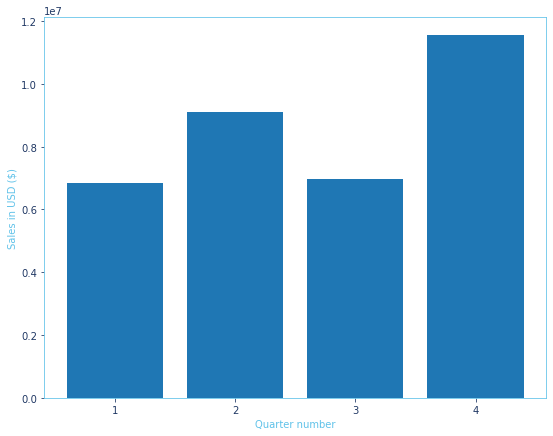

In [33]:
Quart = range(1,5)
plt.figure(figsize=(9,7))
plt.bar(Quart,merged_data.groupby(['Quarter']).sum()['Sales'])
plt.xticks(Quart)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Quarter number')
plt.show()

### $\color{#60C2E9}{\text{We find that Q4 is the best for sales}}$  

### $\color{#203864}{\text{============================================================}}$  

### $\color{#60C2E9}{\text{* Let's descover the best month for sales}}$  

In [34]:
merged_data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Hour,Minute,Sales
Month,,,,,
1,10893,1810924.81,139339,282230,1821413.16
2,13431,2186940.38,172392,354307,2200078.08
3,16979,2789084.64,218622,446783,2804973.35
4,20536,3366218.76,261916,543611,3389217.98
5,18653,3133134.61,238580,487579,3150616.23
6,15234,2560503.50,195223,401839,2576280.15
7,16054,2631225.12,205909,416896,2646461.32
8,13429,2226963.90,172049,353246,2241083.37
9,13091,2081897.65,168206,341151,2094465.69


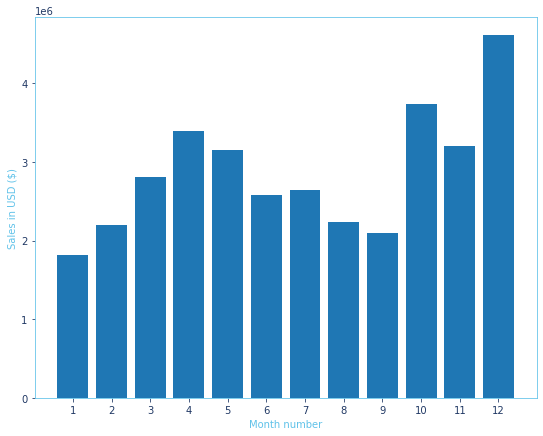

In [35]:
months = range(1,13)
plt.figure(figsize=(9,7))
plt.bar(months,merged_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

### $\color{#60C2E9}{\text{We find that December is the best for sales}}$  

### $\color{#203864}{\text{============================================================}}$  

### $\color{#60C2E9}{\text{* Let's discover which region sold the most product}}$  

In [36]:
merged_data.groupby(['Region']).sum()

,Quantity Ordered,Price Each,Month,Hour,Minute,Sales
Region,,,,,,
East,53143,8714071.30,333574,680071,1395168,8769816.17
South,44428,7336975.10,278816,569769,1165416,7377617.36
West,111241,18211596.07,698303,1426440,2913539,18318104.41


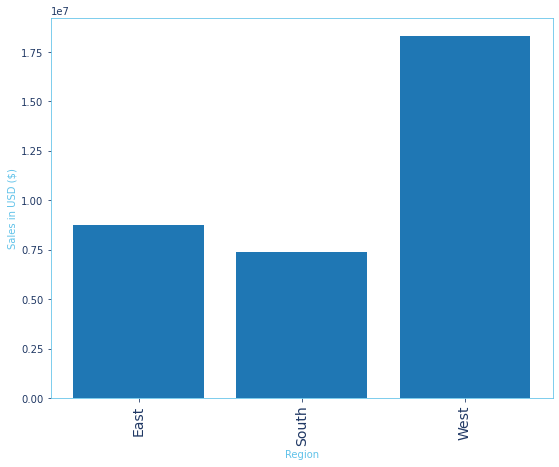

In [37]:
keys = [region for region, df in merged_data.groupby(['Region'])]
plt.figure(figsize=(9,7))
plt.bar(keys,merged_data.groupby(['Region']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Region')
plt.xticks(keys, rotation='vertical', size=14)
plt.show()

### $\color{#60C2E9}{\text{We find that west is the best region}}$  

### $\color{#203864}{\text{============================================================}}$  

### $\color{#60C2E9}{\text{* Let's discover which city sold the most product}}$  

In [38]:
merged_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Hour,Minute,Sales
City,,,,,,
Atlanta,16584,2778608.69,104649,214003,442412,2794199.07
Austin,11137,1808340.03,69720,141688,288674,1818044.33
Boston,22494,3634398.40,140898,287705,589414,3658627.65
Dallas,16707,2750026.38,104447,214078,434330,2765373.96
Los Angeles,33247,5417171.70,208020,426924,865442,5448304.28
New York City,27903,4632920.54,175557,357214,733011,4661867.14
Portland,14037,2306588.80,87636,179394,367847,2319331.94
San Francisco,50169,8204001.38,314949,642269,1317094,8254743.55
Seattle,16534,2730586.55,104817,213005,435899,2745046.02


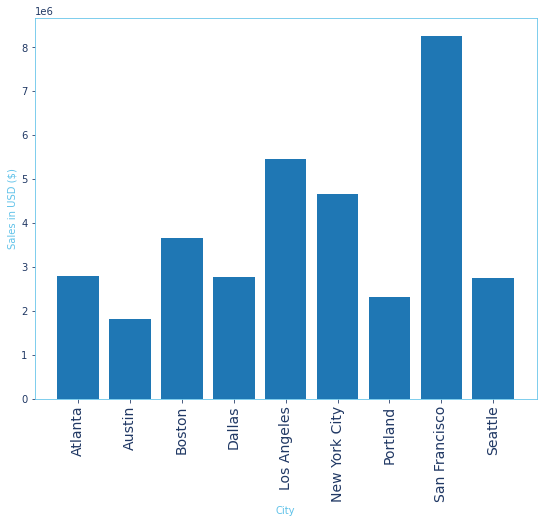

In [39]:
keys = [city for city, df in merged_data.groupby(['City'])]
plt.figure(figsize=(9,7))
plt.bar(keys,merged_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.xticks(keys, rotation='vertical', size=14)
plt.show()

### $\color{#60C2E9}{\text{We find that San Francisco is the best city}}$  

### $\color{#203864}{\text{============================================================}}$  

### $\color{#60C2E9}{\text{* What are the peak sales times?}}$  

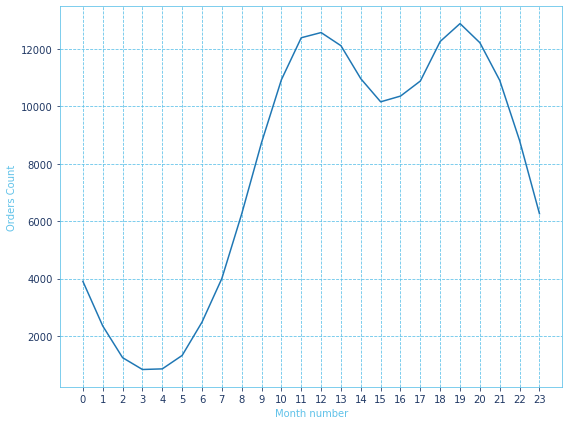

In [40]:
merged_data['Count'] = 1 # to count each order ocuurence
keys = [pair for pair, df in merged_data.groupby(['Hour'])]
plt.figure(figsize=(9,7))
plt.plot(keys, merged_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.xlabel('Month number')
plt.ylabel('Orders Count')
plt.grid()
plt.show()

### $\color{#60C2E9}{\text{we can find that there are 2 peaks in 12am & 7pm}}$  

### $\color{#203864}{\text{============================================================}}$  

### $\color{#60C2E9}{\text{* What is the most soled product}}$  

In [41]:
# Total Quantity Sold for each Product
product_quantity_sold = merged_data.groupby('Product')['Quantity Ordered'].sum()
product_quantity_sold

Product
20in Monitor                   4126
27in 4K Gaming Monitor         6239
27in FHD Monitor               7541
34in Ultrawide Monitor         6192
AA Batteries (4-pack)         27615
AAA Batteries (4-pack)        30986
Apple Airpods Headphones      15637
Bose SoundSport Headphones    13430
Flatscreen TV                  4813
Google Phone                   5529
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23169
Macbook Pro Laptop             4725
ThinkPad Laptop                4128
USB-C Charging Cable          23931
Vareebadd Phone                2068
Wired Headphones              20524
iPhone                         6847
Name: Quantity Ordered, dtype: int64

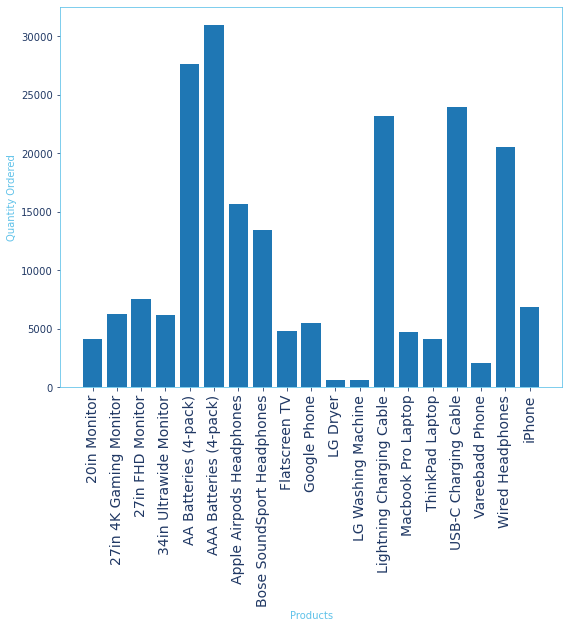

In [42]:
keys = [product for product, df in merged_data.groupby(['Product'])]
plt.figure(figsize=(9,7))
plt.bar(keys,merged_data.groupby(['Product']).sum()['Quantity Ordered'])
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.xticks(keys, rotation='vertical', size=14)
plt.show()

## $\color{#60C2E9}{\text{we can find that the Top 3 sold products is }}$  
### $\color{#60C2E9}{\text{1.AAA Batteries (4-pack)  }}$  
### $\color{#60C2E9}{\text{2.AA Batteries (4-pack }}$   
### $\color{#60C2E9}{\text{3.USB-C Charging Cable}}$

### $\color{#203864}{\text{============================================================}}$  

### $\color{#60C2E9}{\text{* What is the most profitable product}}$  

In [43]:
# Total Sales  for each Product
products_Sales = merged_data.groupby('Product')['Sales'].sum()
products_Sales

Product
20in Monitor                   453818.74
27in 4K Gaming Monitor        2433147.61
27in FHD Monitor              1131074.59
34in Ultrawide Monitor        2352898.08
AA Batteries (4-pack)          106041.60
AAA Batteries (4-pack)          92648.14
Apple Airpods Headphones      2345550.00
Bose SoundSport Headphones    1342865.70
Flatscreen TV                 1443900.00
Google Phone                  3317400.00
LG Dryer                       387600.00
LG Washing Machine             399600.00
Lightning Charging Cable       346376.55
Macbook Pro Laptop            8032500.00
ThinkPad Laptop               4127958.72
USB-C Charging Cable           285975.45
Vareebadd Phone                827200.00
Wired Headphones               246082.76
iPhone                        4792900.00
Name: Sales, dtype: float64

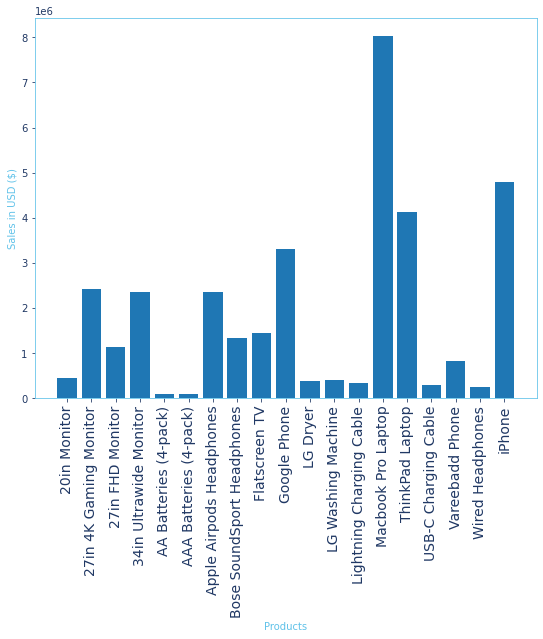

In [44]:
keys = [product for product, df in merged_data.groupby(['Product'])]
plt.figure(figsize=(9,7))
plt.bar(keys,merged_data.groupby(['Product']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Products')
plt.xticks(keys, rotation='vertical', size=14)
plt.show()

### $\color{#60C2E9}{\text{we can find that the Top 3 profitable products is }}$  
### $\color{#60C2E9}{\text{1.Macbook Pro Laptop}}$  
### $\color{#60C2E9}{\text{2.iPhone }}$   
### $\color{#60C2E9}{\text{3.ThinkPad Lapto}}$

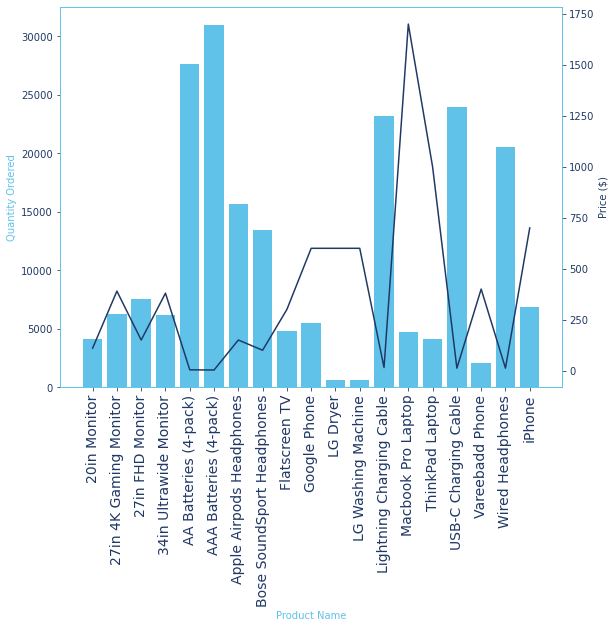

<Figure size 648x504 with 0 Axes>

In [45]:
prices = merged_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots(figsize=(9, 7))


ax2 = ax1.twinx()
ax1.bar(keys, product_quantity_sold, color='#60C2E9')
ax2.plot(keys, prices, color='#203864')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='#60C2E9')
ax2.set_ylabel('Price ($)', color='#203864')
ax1.set_xticklabels(keys, rotation='vertical', size=14)
plt.figure(figsize=(9,7))
fig.show()

# $\color{#203864}{\text{This The Excel Dashboard Image}}$  

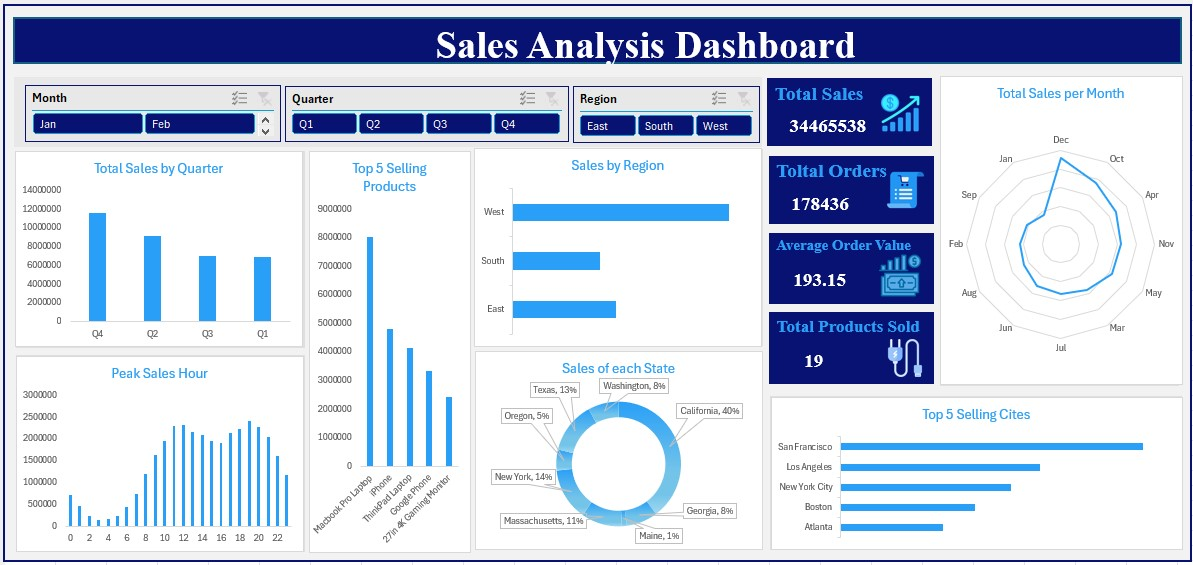